In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

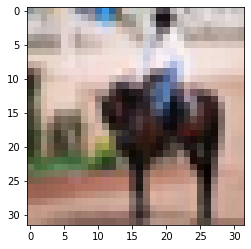

In [5]:
plt.imshow(X_train[11])

In [6]:
X_train[0].max()

255

In [7]:
X_train = X_train/255

In [8]:
X_test = X_test/255

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [13]:
y_cat_test = to_categorical(y_test,num_classes =10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss ='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [18]:
model.fit(X_train,y_cat_train,epochs = 15,validation_data=(X_test,y_cat_test),callbacks=early_stop)

Epoch 1/15
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5140 - accuracy: 0.4530 - val_loss: 1.3283 - val_accuracy: 0.5232
Epoch 2/15
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1805 - accuracy: 0.5807 - val_loss: 1.1566 - val_accuracy: 0.5863
Epoch 3/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0476 - accuracy: 0.6315 - val_loss: 1.0408 - val_accuracy: 0.6360
Epoch 4/15
1563/1563 [==============================] - 24s 16ms/step - loss: 0.9492 - accuracy: 0.6684 - val_loss: 1.0272 - val_accuracy: 0.6434
Epoch 5/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8748 - accuracy: 0.6957 - val_loss: 0.9541 - val_accuracy: 0.6678
Epoch 6/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8061 - accuracy: 0.7173 - val_loss: 0.9689 - val_accuracy: 0.6678
Epoch 7/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7518 - accuracy: 0.7377 - val_loss: 0.9229 -

In [19]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.513967,0.45300,1.328256,0.5232
1,1.180463,0.58074,1.156633,0.5863
2,1.047599,0.63154,1.040754,0.6360
3,0.949198,0.66838,1.027170,0.6434
4,0.874807,0.69574,0.954129,0.6678
5,0.806061,0.71728,0.968859,0.6678
6,0.751836,0.73768,0.922876,0.6840
7,0.700999,0.75346,0.957764,0.6773
8,0.651435,0.77000,0.947948,0.6814


In [20]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

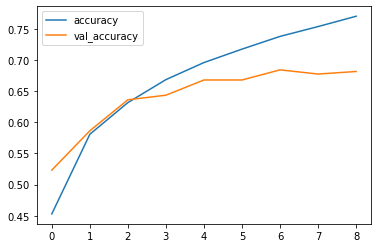

In [21]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

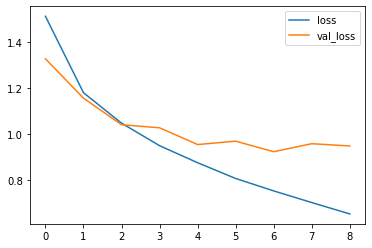

In [22]:
metrics[['loss','val_loss']].plot()

In [23]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.9479479789733887, 0.6814000010490417]

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
pred_probs = model.predict(X_test)
pred_probs

array([[4.9643200e-03, 7.9429685e-04, 2.1852853e-02, ..., 1.3032449e-04,
        1.0520248e-01, 2.4626299e-04],
       [5.6717587e-03, 2.4389815e-02, 6.6874338e-07, ..., 5.7052542e-08,
        9.6926975e-01, 6.6733989e-04],
       [2.4058180e-02, 2.4252253e-02, 3.1104736e-04, ..., 4.7895461e-04,
        9.2659497e-01, 2.1597741e-02],
       ...,
       [6.8377170e-07, 7.4872545e-08, 1.2011446e-02, ..., 4.2836913e-03,
        1.5026453e-06, 4.2491170e-06],
       [7.4963021e-01, 2.6417701e-03, 4.6497150e-03, ..., 7.1305824e-03,
        6.9567718e-06, 2.2036531e-04],
       [3.9482156e-08, 1.9790107e-09, 1.1141840e-06, ..., 9.9902356e-01,
        6.7218529e-09, 6.2744254e-09]], dtype=float32)

In [29]:
predictions = np.argmax(pred_probs,axis=1)
predictions

array([3, 8, 8, ..., 5, 0, 7], dtype=int64)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.80      0.80      0.80      1000
           2       0.59      0.56      0.58      1000
           3       0.48      0.47      0.47      1000
           4       0.69      0.56      0.62      1000
           5       0.50      0.71      0.59      1000
           6       0.83      0.68      0.75      1000
           7       0.77      0.70      0.73      1000
           8       0.80      0.81      0.80      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



<AxesSubplot:>

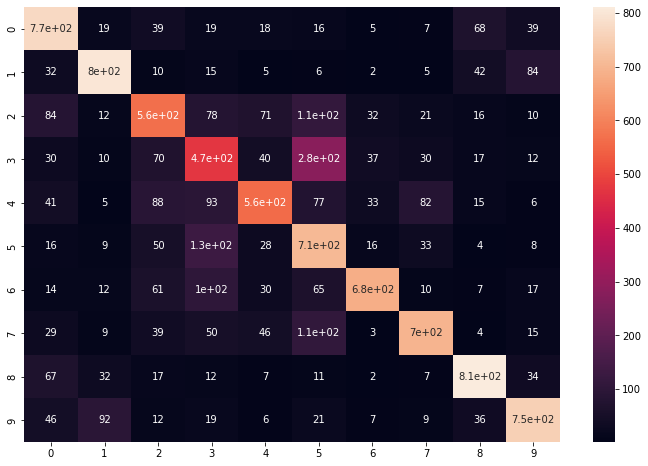

In [32]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [40]:
my_image = X_test[16]

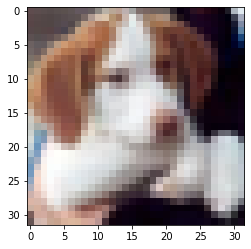

In [41]:
plt.imshow(my_image)

In [45]:
y_test[16]

array([5], dtype=uint8)

In [46]:
pred_probs2 = model.predict(my_image.reshape(1,32,32,3))

In [47]:
predictions = np.argmax(pred_probs2,axis=1)
predictions

array([5], dtype=int64)